# Titanic - Classification Learning Project

<h1 align="center">- $\infty$ -</h1> 

In [1]:
# Common imports
import numpy as np
import os
import pandas as pd

# Libraries for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change directory to project folder.
os.chdir("/Users/kaya/Desktop/Data Science Path/AInteresting/Titanic")

In [3]:
# Training and test set are provided in different files, read both.
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
# Create an X and y dataset from the training set --> These datasets will be used for the training.
X_train = train.copy().drop("Survived", axis=1)
y_train = train.copy()["Survived"]

In [29]:
X_test = test.copy()

In [28]:
len(X_train)

891

891 passengers are present in the training set.

**IF TEST SET WAS NOT PROVIDED EXPLICITLY: Relatively small dataset so we're splitting the data into a 90/10 train/test ratio. This step is skipped in this project.**

In [8]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, 
                                                    #random_state=42)

## Exploratory Data Analysis 

In [8]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

As seen above, 549 passengers survived in the training set and 342 died. Is this survival ratio representing the population (all passengers) accurately? Might be considered when improving the model.

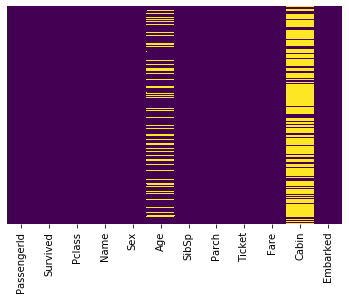

In [12]:
# All yellow points in the heatmap are NULL values. This is for the training set.
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

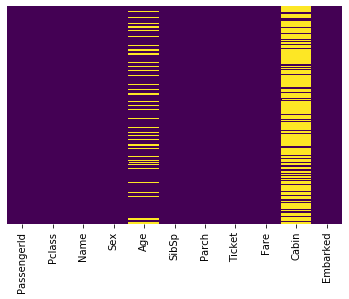

In [13]:
# All yellow points in the heatmap are NULL values. Looking into the test set.
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
# Picking out the features that contain NULL within the training set and calculation NULL ratios.
null_features = [feature for feature in train.columns if sum(train[feature].isnull()) > 0]

for feature in null_features:
    print("The ratio of null values for feature {} is {}".format(feature, 
          (sum(train[feature].isnull()) / len(train[feature]))))

The ratio of null values for feature Age is 0.19865319865319866
The ratio of null values for feature Cabin is 0.7710437710437711
The ratio of null values for feature Embarked is 0.002244668911335578


**Cabin feature will probably be dropped due to the high ratio of null values. Age and Embarked will probably be kept and handled.**

In [31]:
X_train.shape

(891, 11)

In [30]:
y_train.shape

(891,)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Most of the features seem to have correct datatypes e.g. objects for categorical features. Will be more appareant later in the project.

In [33]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


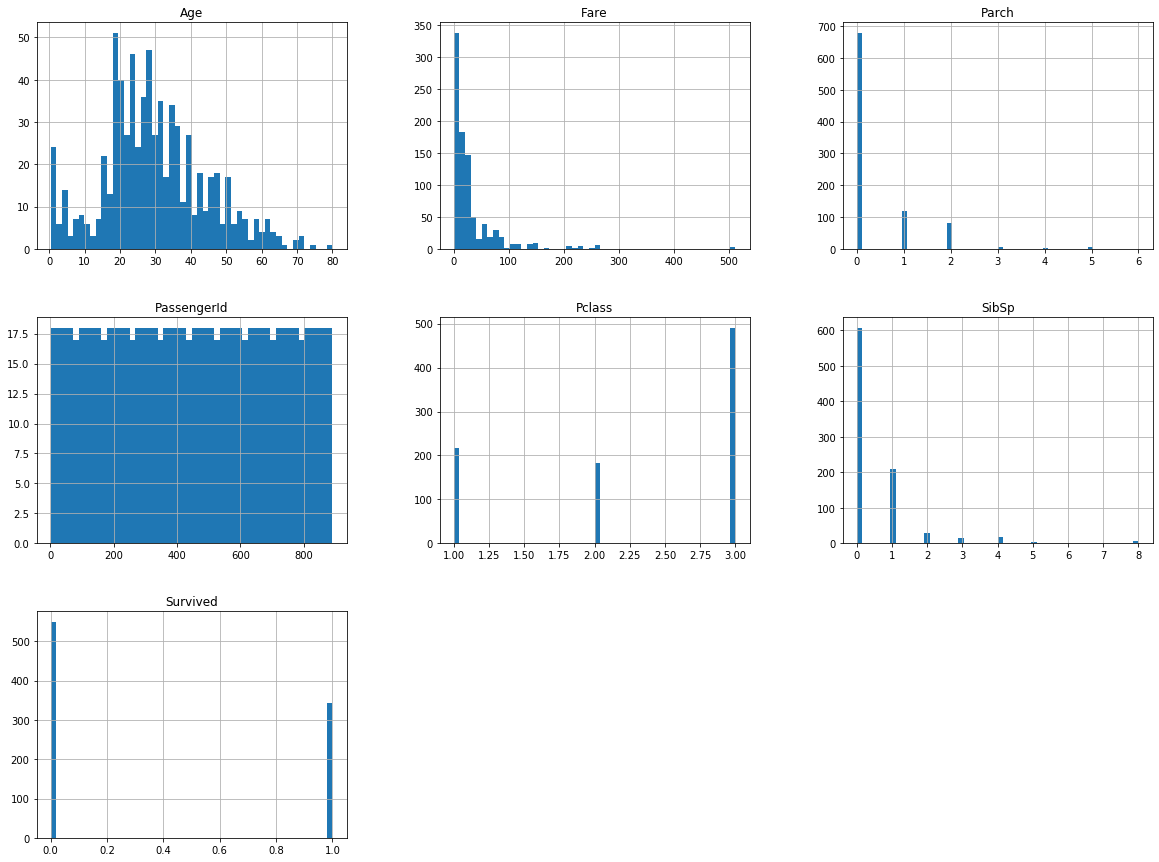

In [36]:
# Visualizing numerical features
data = train.copy()
data.hist(bins=50, figsize=(20,15))
plt.show()

**PClass is categorical, will be converted accordingly in the data cleaning phase.**

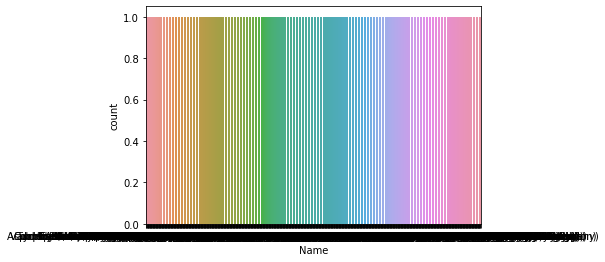

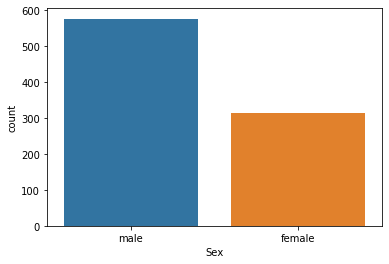

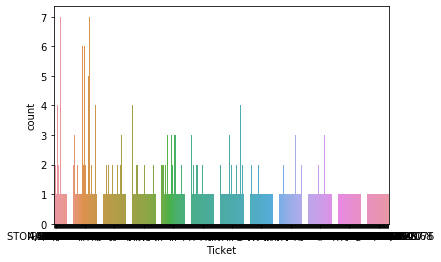

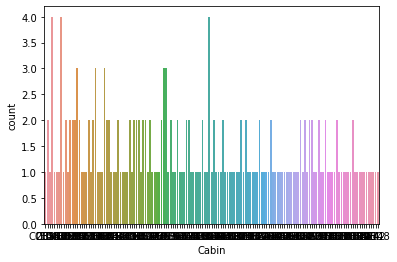

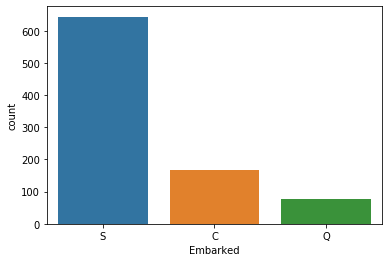

In [20]:
# Visualizing categorial features
cat_features = [feature for feature in train.columns if train[feature].dtype == "O"]

for feature in cat_features:
    data = X.copy()
    sns.countplot(data[feature])
    plt.show()

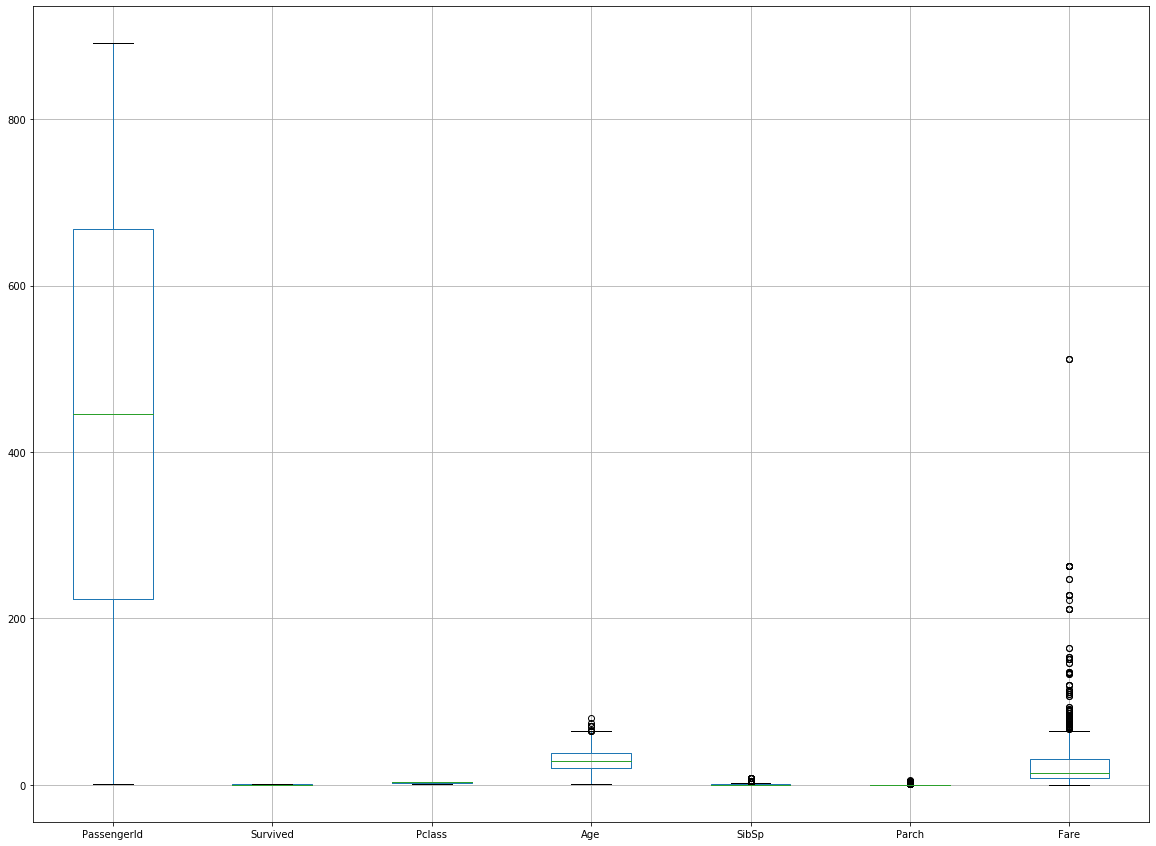

In [37]:
# Boxplots to visualize outliers. 
train.boxplot(figsize=(20,15))

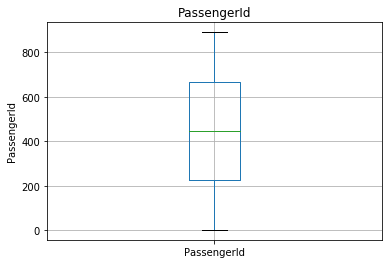

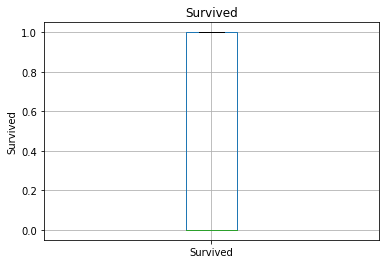

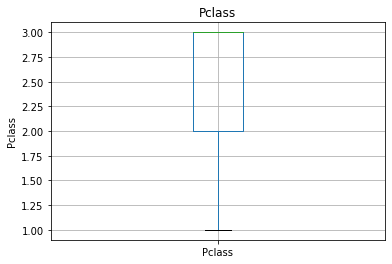

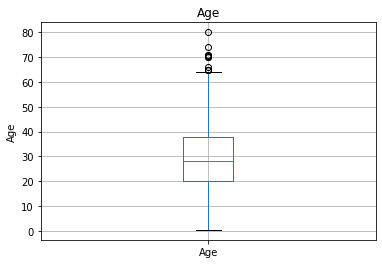

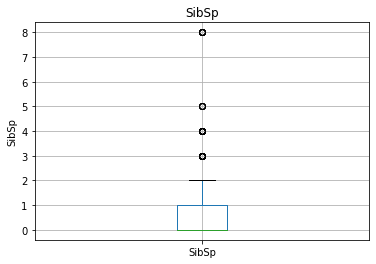

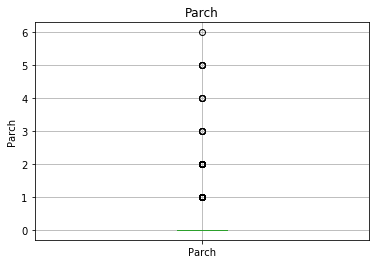

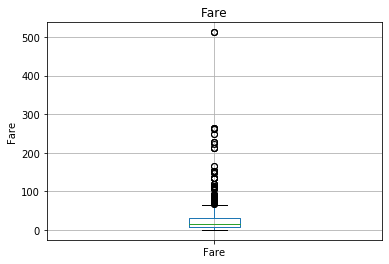

In [38]:
num_features = [feature for feature in train.columns if train[feature].dtype != "O"]

for feature in num_features:
    data = train.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [39]:
# One feature with outliers is 'Age'. Here we look at the difference of picking the mean vs the median.
print("Age Mean: ", train["Age"].mean())
print("Age Median: ", train["Age"].median())

Age Mean:  29.69911764705882
Age Median:  28.0


**All num values have outliers so we will go with the medians. Example of age featurea above.**

In [40]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [41]:
# Correlations
data = train.copy()
corr = data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


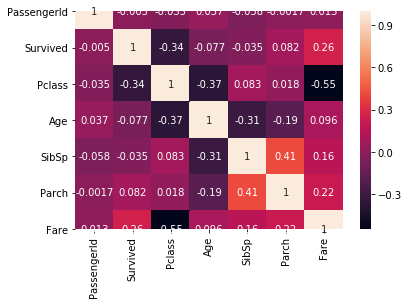

In [42]:
sns.heatmap(corr, annot=True)

**Highest correlations are between Pclass-Fare and SibSp-Parch.**
Note correlation matrix visualization is cut on the top and bottom edges due to bug in the heatmap lib.

## Data preparation

In [43]:
# Create a copy of the original X_train set.
data = X_train.copy()

### Preprocessing numerical features

Preprocessing numerical features, dropping the PassengerId feature and turning the Pclass feature into a categorical feature. Median is used for the Imputer() due to outliers in almost all numerical features (see boxplots above).

In [44]:
num_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [46]:
train[num_features].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [50]:
cat_features.append("Pclass")

In [47]:
# Transformer for picking features within the dataset.
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [48]:
# Pipeline for pre-processing numerical features. 
# The features we keep and therefore preprocess are ["Age", "SibSp", "Parch", "Fare"].
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

### Preprocessing categorical features

All name/id features are dropped as well as the 'Cabin' feature due to having 77% NaN values.

In [51]:
data[cat_features].head()

,Name,Sex,Ticket,Cabin,Embarked,Pclass
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,1
4,"Allen, Mr. William Henry",male,373450,NaN,S,3


In [53]:
# Impute with the most frequent value for categorical features. Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [56]:
# One-hot encoding transformer. The first value is dropped --> a feature with 3 unique values gives 2 new features.
class OneHot(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return pd.get_dummies(X.astype(str), prefix_sep='_', drop_first=True)

In [57]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Sex", "Embarked", "Pclass"])),
        ("imputer", MostFrequentImputer()),
        ("onehot", OneHot())
    ])

### Finalizing the pre-processing pipeline

In [58]:
#Combining the num and cat pipeline.
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline)
    ])

In [64]:
# Transforming X_train.
X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)

In [65]:
X_train_preprocessed

array([[-0.56573646,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  1.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ]])

In [66]:
X_train_preprocessed.shape

(891, 9)

In [63]:
y_train.shape

(891,)

## Model Selection

## Training a range of models with 10 fold cross-validation to get an indication of how they perform. 

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
# Trying SVC
from sklearn.svm import SVC

svc_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svc_clf, X_train_preprocessed, y_train, cv=10)
svm_scores.mean()

0.823816252411758

In [70]:
# Trying KNeighbours Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train_preprocessed, y_train, cv=10)
knn_scores.mean()

0.7991209851322211

In [72]:
# Trying the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()
rnd_scores = cross_val_score(rnd_clf, X_train_preprocessed, y_train, cv=10)
rnd_scores.mean()

/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/py

0.8115568607422541

In [73]:
# Trying the Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_scores = cross_val_score(ada_clf, X_train_preprocessed, y_train, cv=10)
ada_scores.mean()

0.8115812620587901

In [74]:
# Trying Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_scores = cross_val_score(sgd_clf, X_train_preprocessed, y_train, cv=10)
sgd_scores.mean()

0.7722548518896833

In [75]:
# Trying GaussianNB
from sklearn.naive_bayes import GaussianNB 

gnb_clf = GaussianNB()
gnb_scores = cross_val_score(gnb_clf, X_train_preprocessed, y_train, cv=10)
gnb_scores.mean()

0.7879724208375892

In [76]:
# Trying Decision Tree
from sklearn.tree import DecisionTreeClassifier 

dt_clf = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_clf, X_train_preprocessed, y_train, cv=10)
dt_scores.mean()

0.7857260810350699

In [78]:
# Function that automatically creates a KAGGLE submission file. 
# Input parameters are: the trained model, a file name tag, the test dataset and a preprocessed X_test.
def prepare_submission(model, submission_tag, test_set, X_test_preprocessed):
    y_test = model.predict(X_test_preprocessed)
    y_test = y_test.reshape(len(y_test), 1)
    submission_file = test_set.copy()
    submission_file["Survived"] = y_test
    submission_file = submission_file[["PassengerId", "Survived"]]
    filename = "Submission_{}.csv".format(submission_tag)
    submission_file.to_csv(filename, index=False)
    print("Submission file '{}' saved.".format(filename))

**Model SVC (Support Vector Classifier) performed best with default values.**

In [79]:
X_test_preprocessed = preprocess_pipeline.fit_transform(X_test)

In [84]:
# Training the best model from the cross-validation runs.
svc_clf = SVC(gamma="auto")
svc_clf.fit(X_train_preprocessed, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
prepare_submission(svc_clf, "SVC_1", test, X_test_preprocessed)

Submission file 'Submission_SVC_1.csv' saved.


**Submitted with a 0.78229 accuracy score. Position is 3700.**

**Adaboost classifier performed second best with default values.**

In [85]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [86]:
prepare_submission(ada_clf, "Ada_1", test, X_test_preprocessed)

Submission file 'Submission_Ada_1.csv' saved.


**Submitted with a 0.74641 score.**

---------------------------------

## Hyperparamater Tuning with the AdaBoost Classifier

Choosing the Adaboost model for hyperparameter tuning due to problems with SVC and GridSearchCV. This is revisited in the upcoming chapter, where SVC is tuned.

In [88]:
X_train_preprocessed.shape

(891, 9)

In [89]:
y_train.shape

(891,)

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'n_estimators': [500,1000,2000],
    'learning_rate': [.001,0.01,.1]
}]


ada_clf = AdaBoostClassifier()
grid_search = GridSearchCV(ada_clf, param_grid, cv=3,
                           verbose=4)
grid_search.fit(X_train_preprocessed,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] learning_rate=0.001, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, n_estimators=500, score=0.788, total=   0.9s
[CV] learning_rate=0.001, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=500, score=0.801, total=   0.8s
[CV] learning_rate=0.001, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=500, score=0.771, total=   0.7s
[CV] learning_rate=0.001, n_estimators=1000 ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=1000, score=0.788, total=   1.4s
[CV] learning_rate=0.001, n_estimators=1000 ..........................
[CV]  learning_rate=0.001, n_estimators=1000, score=0.801, total=   2.0s
[CV] learning_rate=0.001, n_estimators=1000 ..........................
[CV]  learning_rate=0.001, n_estimators=1000, score=0.771, total=   1.5s
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.788, total=   2.7s
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.801, total=   3.0s
[CV] learning_rate=0.001, n_estimators=2000 ..........................
[CV]  learning_rate=0.001, n_estimators=2000, score=0.771, total=   3.1s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV]  learning_rate=0.01, n_estimators=500, score=0.805, total=   0.7s
[CV] learning_rate=0.01, n_estimators=500 .......................

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   47.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid=[{'learning_rate': [0.001, 0.01, 0.1],
                          'n_estimators': [500, 1000, 2000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [125]:
best_params = grid_search.best_params_

In [128]:
best_params

{'learning_rate': 0.1, 'n_estimators': 2000}

In [126]:
ada_clf = AdaBoostClassifier(**best_params)
ada_clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=2000, random_state=None)

In [127]:
prepare_submission(ada_clf, "Ada_2", test, X_test_preprocessed)

Submission file 'Submission_Ada_2.csv' saved.


**Scored 0.73684 with tuned hyperparameters. Overfitting?**

### Randomized grid search

In [149]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dists = {
    'n_estimators': range(0,100000),
    'learning_rate': np.arange(0, 5, 0.001)  
    }
    
ada_clf = AdaBoostClassifier()
rnd_search = RandomizedSearchCV(ada_clf, param_distributions=param_dists, n_iter=50,
                               cv=3, verbose=4, random_state=42, n_jobs=-1)
rnd_search.fit(X, y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 80.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 130.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.997e+00, 4.998e+00,
       4.999e+00]),
                                        'n_estimators': range(0, 100000)},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=4)

In [153]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.592885,0.045811,0.269034,0.009062,595,1.999,"{'n_estimators': 595, 'learning_rate': 1.999}",0.787879,0.747475,0.771044,0.768799,0.016571,24
1,380.050103,2.899755,44.946432,0.837600,90492,3.251,"{'n_estimators': 90492, 'learning_rate': 3.251}",0.212121,0.198653,0.228956,0.213244,0.012397,37
2,314.846203,9.802341,34.074121,2.225607,75502,2.509,"{'n_estimators': 75502, 'learning_rate': 2.509}",0.212121,0.198653,0.228956,0.213244,0.012397,37
3,128.336178,7.908279,17.696191,1.176681,35466,4.595,"{'n_estimators': 35466, 'learning_rate': 4.595}",0.212121,0.198653,0.228956,0.213244,0.012397,37
4,67.737599,0.257207,8.007691,0.064272,21863,1.275,"{'n_estimators': 21863, 'learning_rate': 1.275...",0.734007,0.727273,0.760943,0.740741,0.014547,28
5,117.028183,2.975457,21.449737,3.666487,34972,4.237,"{'n_estimators': 34972, 'learning_rate': 4.237}",0.212121,0.198653,0.228956,0.213244,0.012397,37
6,265.727220,4.260712,29.581869,0.567555,68276,4.159,"{'n_estimators': 68276, 'learning_rate': 4.159}",0.212121,0.198653,0.228956,0.213244,0.012397,37
7,78.519372,6.708443,8.856327,0.169287,24038,1.332,"{'n_estimators': 24038, 'learning_rate': 1.332}",0.727273,0.720539,0.757576,0.735129,0.016109,30
8,77.832127,0.952894,10.669935,2.230680,24377,3.042,"{'n_estimators': 24377, 'learning_rate': 3.042...",0.787879,0.801347,0.771044,0.786756,0.012397,2
9,64.946261,1.500199,7.592053,0.071572,20466,1.331,"{'n_estimators': 20466, 'learning_rate': 1.331}",0.727273,0.720539,0.767677,0.738496,0.020816,29


In [150]:
rnd_search.best_params_

{'n_estimators': 44769, 'learning_rate': 0.033}

In [151]:
prepare_submission(rnd_search.best_estimator_, "Ada_3", test, X_test)

Submission file 'Submission_Ada_3.csv' saved.


**Score is 0.72966, even worse than before the tuning. Will have to look into this and eventually revisit.**

---------

## New transformations and Hyperparameter tuning with SVC Classifier.

**Will reimplement the prepare pipeline with added transformers:**
- Combine sib och parch by adding them --> DONE.
- Categorize age or fare? --> Later.
- Look into cabin --> only higher payers got a cabin number on their ticket? --> Dismissed.
- Extract titles from names --> DONE.
- Combine features? --> Later.
- Drop features --> Later.

In [90]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Extracting Titles from Names

As the names are including titles, we extract the titles into its own feature. The following common titles are extracted ["Mr.", "Mrs.", "Miss.", "Master."], and remaining titles are tagged as "Other".

In [92]:
train["Name"].iloc[:20]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [98]:
# Transformer that extracts the titles from the passenger names. 
class extract_titles(BaseEstimator, TransformerMixin):
    def __init__(self, status=True):
        self.status = status
    def fit(self, X, y=None):
        return self
    def extract_title(self, name):
        split_name = str.split(name, " ")
        for word in split_name:
            if word[-1] == ".":
                if word not in ["Mr.", "Mrs.", "Miss.", "Master."]:
                    word = "Other"
                return word
            else:
                pass
    def transform(self, X):
        if self.status:
            X["Title"] = X.copy()["Name"].apply(lambda x: self.extract_title(x))
            return X
        else:
            return X.copy()

In [95]:
et = extract_titles(status=True)
train_data_titles = et.fit_transform(train)

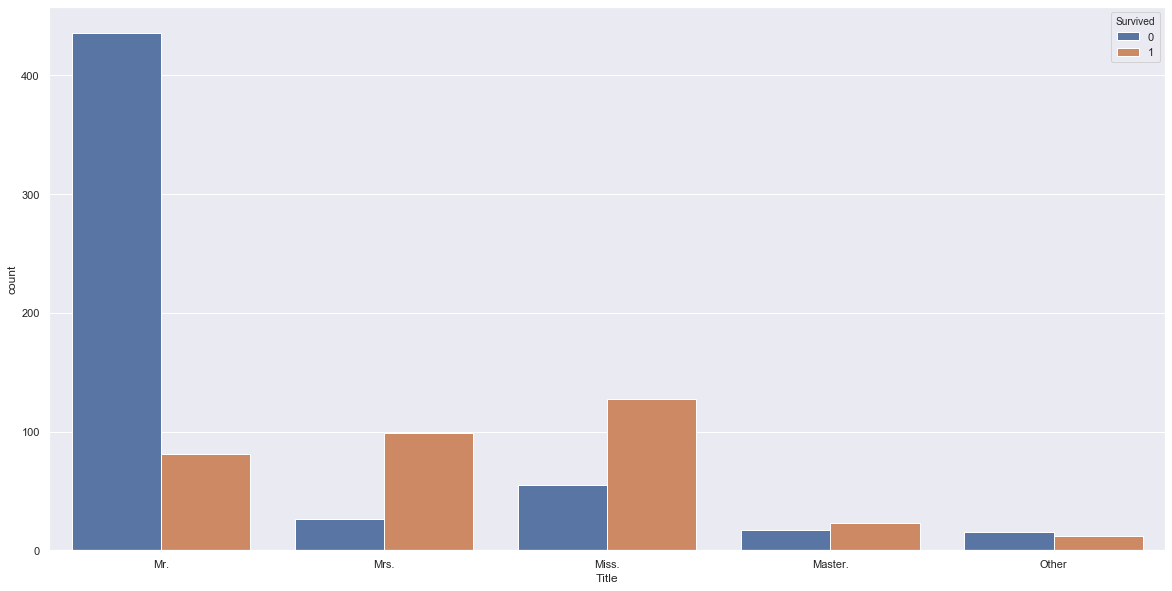

In [96]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.countplot(data=train_data_titles, x="Title", hue="Survived")
plt.show()

Interesting insight:
- Grown men had a very low chance of surviving
- Women had a good chance of surviving
- Boys and young men had a pretty good chance of surviving (over 50%)

### Combining SibSp and Parch

As the relatives are given within two features SibSp and Parch, we combine them into one feature named "Relatives"

In [99]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


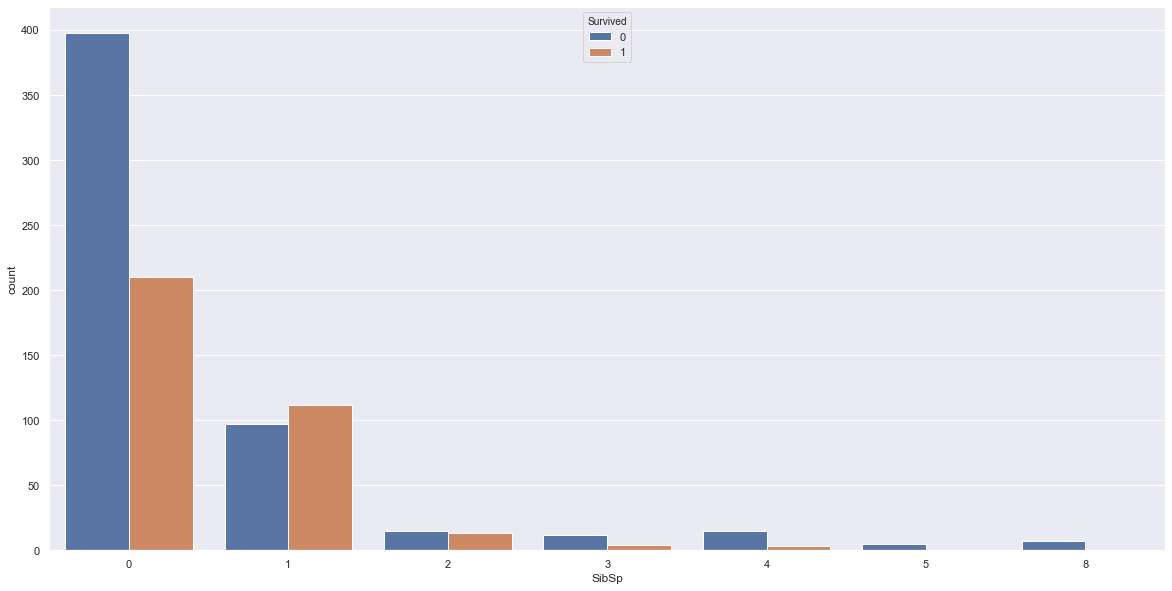

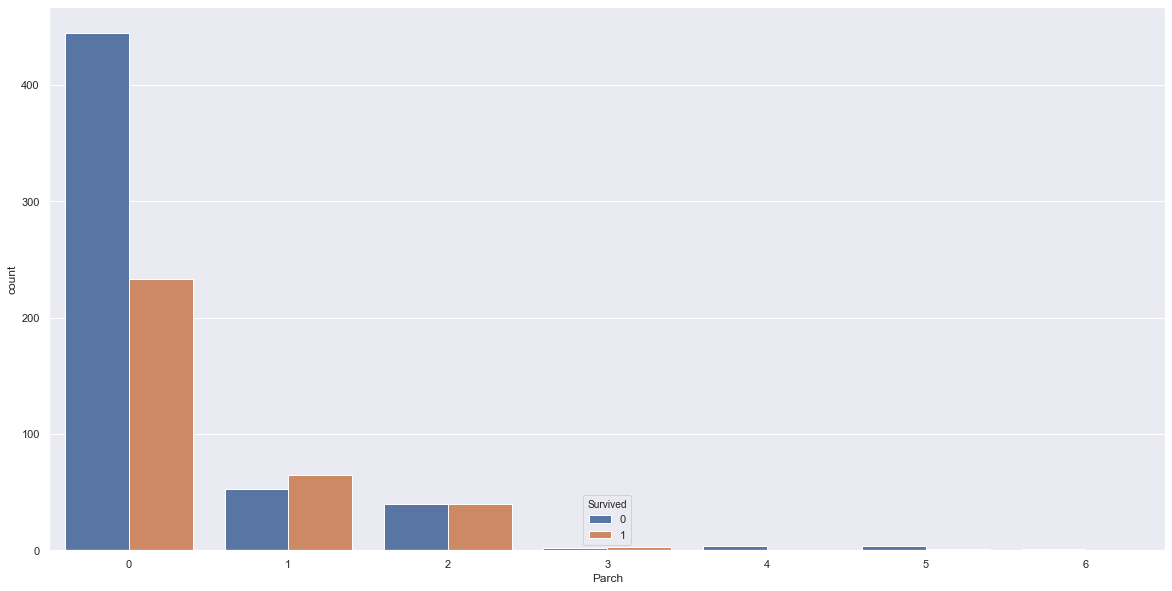

In [101]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.countplot(data=train, x="SibSp", hue="Survived")
plt.show()
sns.countplot(data=train, x="Parch", hue="Survived",)
plt.show()

In [102]:
data = train.copy()

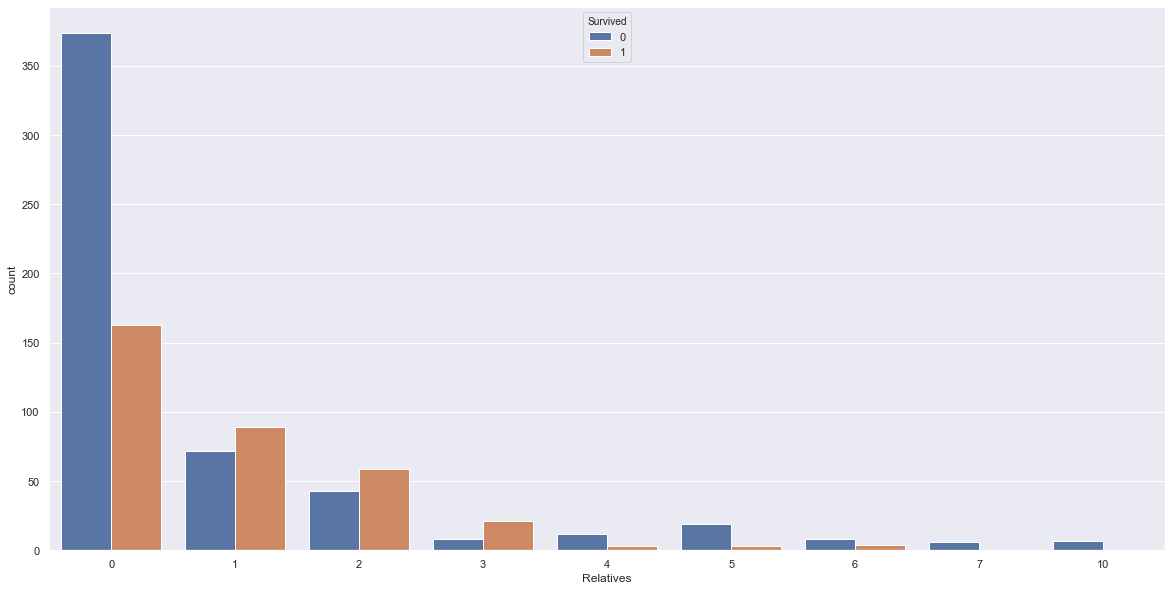

In [103]:
data["Relatives"] = data["Parch"] + data["SibSp"]
sns.countplot(data=data, x="Relatives", hue="Survived",)
plt.show()

Interesting insight: 
- People who boarded without relatives had around 30% chance of surviving 
- People with 1 to 3 relatives had a higher chance of surviving than 50%
- People with over 3 relatives had a very low chance of suurviving

In [143]:
# Transformer to sum relatives and return a new column named relatives. 
# Note this transformer also drops both the original features and replaces it with the new "Relatives" feature.
class sum_relatives(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        data = X.copy()
        data["Relatives"] = data["Parch"] + data["SibSp"]
        #data = data.drop("Parch", axis=1)
        #data = data.drop("SibSp", axis=1)
        return data

In [106]:
sr = sum_relatives()
ress = sr.fit_transform(data)

In [107]:
ress

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,0


### Exploration of Cabins

Exploring the 'Cabin' feature to see if any interesting insights can be gained.

In [110]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [113]:
data = train.copy()
data["Cabin_prefix"] = data["Cabin"].str.replace('\d+', '')
data["Cabin_prefix"] = data["Cabin_prefix"].str.split(' ').str[0]
data["Cabin_prefix"].fillna("Missing", inplace=True)

In [114]:
data["Cabin_prefix"].unique()

array(['Missing', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

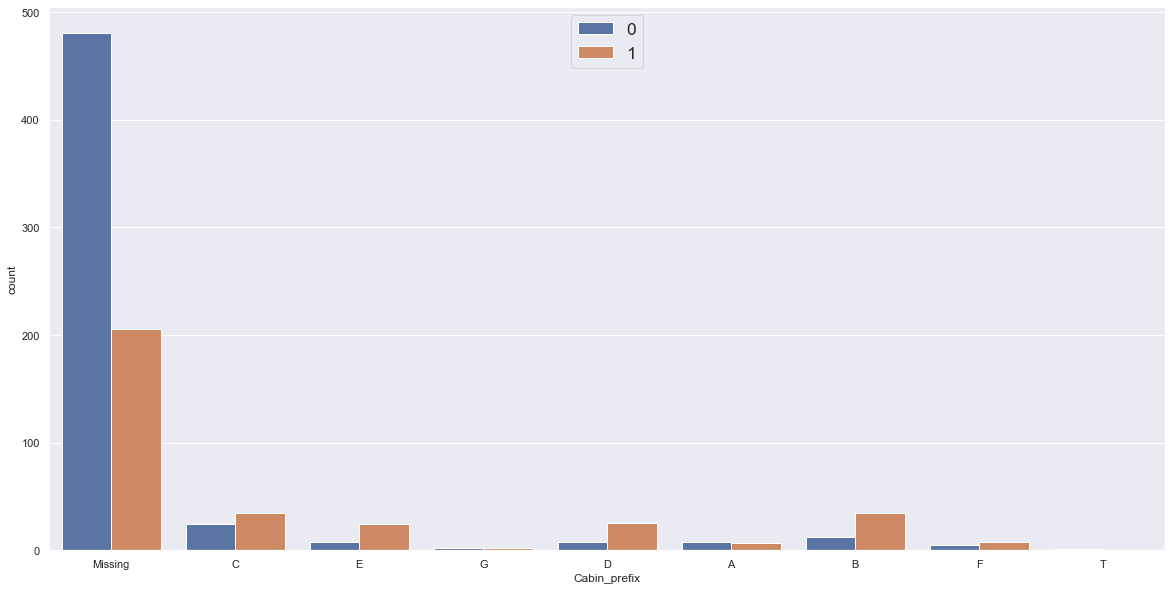

In [115]:
sns.countplot(data=data, x="Cabin_prefix", hue="Survived",)
plt.legend(fontsize="x-large")
plt.show()

Interesting survival rates in cabin C, E, D and B. However, a very high amount of missing values so this will not be used at this point.

### Exploration of Tickets

Exploring the 'Ticket' feature to see if any interesting insights can be gained.

In [117]:
train["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [118]:
data = train.copy()
data["Ticket_prefix"] = data["Ticket"].str.replace('\d+', 'Num')
data["Ticket_prefix"] = data["Ticket_prefix"].str.split(' ').str[0]
data["Ticket_prefix"].fillna("Missing", inplace=True)

In [119]:
data["Ticket_prefix"].unique()

array(['A/Num', 'PC', 'STON/ONum.', 'Num', 'PP', 'A/Num.', 'C.A.',
       'A./Num.', 'SC/Paris', 'S.C./A.Num.', 'CA', 'S.P.', 'S.O.C.',
       'SO/C', 'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'ANum.', 'C',
       'SOTON/O.Q.', 'SC/PARIS', 'S.O.P.', 'A.Num.', 'Fa', 'CA.', 'LINE',
       'F.C.C.', 'W/C', 'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S',
       'WE/P', 'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/ONum', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [462]:
data["Ticket_prefix"].value_counts()

Num            661
PC              60
C.A.            27
A/Num           13
STON/O          12
A/Num.          10
W./C.            9
SOTON/O.Q.       8
CA.              8
SOTON/OQ         7
CA               6
STON/ONum.       6
SC/PARIS         5
F.C.C.           5
C                5
S.O.C.           5
SC/Paris         4
LINE             4
PP               3
S.O./P.P.        3
SC/AH            3
A./Num.          2
A.Num.           2
WE/P             2
S.C./PARIS       2
SOTON/ONum       2
P/PP             2
Fa               1
SCO/W            1
ANum.            1
W.E.P.           1
W/C              1
SW/PP            1
S.W./PP          1
A/S              1
SO/C             1
SC               1
S.P.             1
S.C./A.Num.      1
S.O.P.           1
C.A./SOTON       1
F.C.             1
Name: Ticket_prefix, dtype: int64

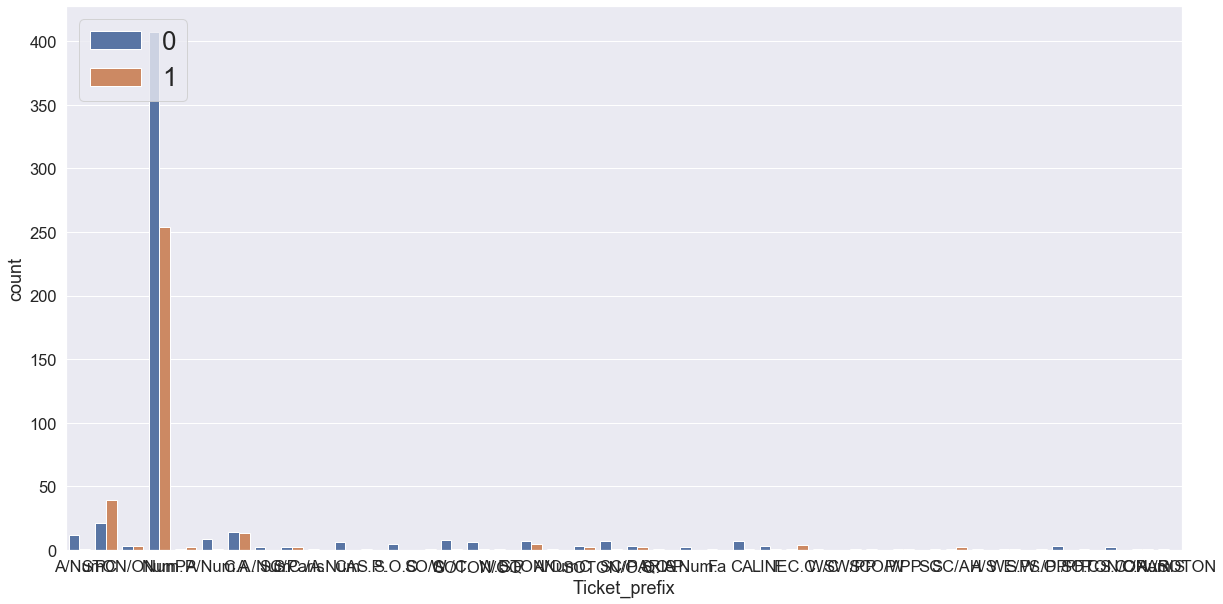

In [454]:
sns.countplot(data=data, x="Ticket_prefix", hue="Survived",)
plt.legend(fontsize="x-large")
plt.show()

In [120]:
from sklearn.preprocessing import LabelEncoder

class extract_ticket_labels(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        lb_make = LabelEncoder()
        data = X.copy()
        data["Ticket_prefix"] = data["Ticket"].str.replace('\d+', 'Num')
        data["Ticket_prefix"] = data["Ticket_prefix"].str.split(' ').str[0]
        data["Ticket_prefix"].fillna("Missing", inplace=True)
        data["Ticket_prefix_code"] = lb_make.fit_transform(data["Ticket_prefix"])  
        return data

Interesting insights can be gained from the ticket prefixes but this will not be used at this point. The transformer above will not be used either.

### Rebuilding the pipeline.

In [121]:
# Added transformers
feature_engineering = Pipeline([
        ("extract_titles", extract_titles()),
        ("sum_relatives", sum_relatives())
    ])

In [144]:
num_pipeline_improved = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare", "Relatives"])),
        #("select_numeric", DataFrameSelector(["Age", "Fare", "Relatives"])),
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [145]:
cat_pipeline_improved = Pipeline([
        ("select_cat", DataFrameSelector(["Sex", "Embarked", "Pclass", "Title"])),
        ("imputer", MostFrequentImputer()),
        ("onehot", OneHot())
    ])

In [146]:
preprocess_pipeline_improved = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline_improved),
        ("cat_pipeline", cat_pipeline_improved)
    ])

In [147]:
# Full Pipeline
engineer_prepare_pipeline = Pipeline([
    ("feature_engineer", feature_engineering),
    ("prepare", preprocess_pipeline_improved)
    ]) 

In [148]:
X_train_preprocessed_mod = engineer_prepare_pipeline.fit_transform(X_train)

In [149]:
len(X_train_preprocessed_mod[1])

14

### Trying Models with Cross-Validation.

In [129]:
from sklearn.model_selection import cross_val_score

# Trying SVC
from sklearn.svm import SVC

svc_clf = SVC(gamma="auto")
svc_scores = cross_val_score(svc_clf, X_train_preprocessed_mod, y_train, cv=10)
print("SVC:", svc_scores.mean())

# Trying KNeighbours Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train_preprocessed_mod, y_train, cv=10)
print("KNN:", knn_scores.mean())

# Trying the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()
rnd_scores = cross_val_score(rnd_clf, X_train_preprocessed_mod, y_train, cv=10)
print("Random Forest:", rnd_scores.mean())

# Trying the Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_scores = cross_val_score(ada_clf, X_train_preprocessed_mod, y_train, cv=10)
print("Ada Boost:", ada_scores.mean())


# Trying Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_scores = cross_val_score(sgd_clf, X_train_preprocessed_mod, y_train, cv=10)
print("Stochastic Gradient Descent Classifier:", sgd_scores.mean())

# Trying GaussianNB
from sklearn.naive_bayes import GaussianNB 

gnb_clf = GaussianNB()
gnb_scores = cross_val_score(gnb_clf, X_train_preprocessed_mod, y_train, cv=10)
print("GaussianNB:", gnb_scores.mean())

# Trying Decision Tree
from sklearn.tree import DecisionTreeClassifier 

dt_clf = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_clf, X_train_preprocessed_mod, y_train, cv=10)
dt_scores.mean()
print("Decision Tree:", dt_scores.mean())

SVC: 0.8294220292815797
KNN: 0.8181974236749519


/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/py

Random Forest: 0.8059391669504029
Ada Boost: 0.8092844172057656
Stochastic Gradient Descent Classifier: 0.7980226421518556
GaussianNB: 0.7867358983089321
Decision Tree: 0.7867991714901829


In [150]:
svc_clf.fit(X_train_preprocessed_mod, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
X_test_new = engineer_prepare_pipeline.fit_transform(X_test)

In [152]:
prepare_submission(svc_clf, "SVC_new_2", test, X_test_new)

Submission file 'Submission_SVC_new_2.csv' saved.


**Score is 0.78229 and not improved.**

### Hyper-parameter tuning SVC

In [561]:
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X, y, cv=10)
print("SVC:", svc_scores.mean())

/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-p

SVC: 0.8294220292815797


/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # trying rbf kernel combinations
    {'kernel': ["rbf"], 'gamma': [0.01, 0.1, 1, 10, 100], 'C' : [0.1, 1, 10, 100, 1000, 5000]},
    # trying poly kernel combinations
    {'kernel': ["poly"], 'degree': [1, 2, 3, 4, 5], 'gamma': [0.01, 0.1, 1, 10, 100], 'C': [0.1, 1, 10, 100, 1000, 5000]},
  ]

svc_clf = SVC()
# train across 3 folds
grid_search = GridSearchCV(svc_clf, param_grid, cv=5, verbose=3,
                           return_train_score=True)
grid_search.fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.656, test=0.626), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.626, test=0.637), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.654, test=0.629), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.637, test=0.640), total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=(train=0.626, test=0.644), total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=(train=0.824, test=0.827), total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=(train=0.829, test=0.816), total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=(train=0.832, test=0.809), total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=(train=0.832, test=0.809), total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=(train=0.818, test=0.847), total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=(train=0.855, test=0.749), total=  

[CV]  C=10, gamma=0.1, kernel=rbf, score=(train=0.865, test=0.787), total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=(train=0.849, test=0.864), total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=(train=0.906, test=0.771), total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=(train=0.912, test=0.777), total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=(train=0.893, test=0.848), total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=(train=0.902, test=0.803), total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=(train=0.903, test=0.814), total=   0.1s
[CV] C=10,

[CV]  C=1000, gamma=1, kernel=rbf, score=(train=0.934, test=0.781), total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=(train=0.938, test=0.753), total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=(train=0.934, test=0.701), total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV]  C=1000, gamma=10, kernel=rbf, score=(train=0.963, test=0.670), total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV]  C=1000, gamma=10, kernel=rbf, score=(train=0.965, test=0.648), total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV]  C=1000, gamma=10, kernel=rbf, score=(train=0.959, test=0.725), total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV]  C=1000, gamma=10, kernel=rbf, score=(train=0.959, test=0.702), total=   0

[CV]  C=0.1, degree=1, gamma=10, kernel=poly, score=(train=0.832, test=0.809), total=   0.0s
[CV] C=0.1, degree=1, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=1, gamma=10, kernel=poly, score=(train=0.839, test=0.787), total=   0.0s
[CV] C=0.1, degree=1, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=1, gamma=10, kernel=poly, score=(train=0.819, test=0.859), total=   0.0s
[CV] C=0.1, degree=1, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=1, gamma=100, kernel=poly, score=(train=0.827, test=0.849), total=   0.0s
[CV] C=0.1, degree=1, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=1, gamma=100, kernel=poly, score=(train=0.830, test=0.827), total=   0.1s
[CV] C=0.1, degree=1, gamma=100, kernel=poly .........................
[CV]  C=0.1, degree=1, gamma=100, kernel=poly, score=(train=0.835, test=0.809), total=   0.0s
[CV] C=0.1, degree=1, gamma=100, kernel=poly .........................
[CV]  C=0.1, 

[CV]  C=0.1, degree=3, gamma=10, kernel=poly, score=(train=0.910, test=0.764), total=  36.4s
[CV] C=0.1, degree=3, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=3, gamma=10, kernel=poly, score=(train=0.917, test=0.758), total=   9.7s
[CV] C=0.1, degree=3, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=3, gamma=10, kernel=poly, score=(train=0.910, test=0.785), total=  17.6s
[CV] C=0.1, degree=3, gamma=100, kernel=poly .........................


In [ ]:
grid_search.best_params_

In [586]:
grid_search.best_score_

0.835016835016835

In [587]:
prepare_submission(grid_search.best_estimator_, "SVC_3", test, X_test)

Submission file 'Submission_SVC_3.csv' saved.


## Summary of Project

This project was completed in order to:
- Complete an E2E data science project.
- Learn how to participate in a Kaggle Competition
- Practice classification and pipelines
- Practice documentation

The project outcome is not in focus of this project, hence I have not dedicated a siginificant amount into hyperparameter tuning and improving the score. The goal was to practice the concepts.